In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from bitcoin.db import get_all_data
import numpy as np

df = get_all_data()


2018-03-18 11:31:58,891 root         INFO     Load data from SQL.


In [2]:
df[df.isnull().any(axis=1)]

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment,predicted_price


In [3]:
df.describe()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment,predicted_price
count,1.725500e+04,17255.000000,17255.000000,17255.000000,17255.000000,17255.000000,17255.000000,1.725500e+04,17255.000000,17255.000000,17255.000000
mean,1.520800e+09,7484.247190,7490.610872,7487.685744,7487.509940,1.735118,0.062198,4.658735e+05,0.061898,0.032665,724.479811
std,3.116485e+05,784.089781,783.523784,783.731221,783.771661,3.780015,0.079892,3.242056e+05,0.035437,0.065954,2053.398308
min,1.520272e+09,6162.020000,6169.530000,6162.020000,6162.020000,0.000673,-0.084993,2.743700e+04,-0.028105,-0.100305,0.000000
25%,1.520532e+09,6799.780000,6813.600000,6806.685000,6808.195000,0.141633,0.018309,2.186860e+05,0.035452,-0.014069,0.000000
50%,1.520791e+09,7415.240000,7422.740000,7419.990000,7419.760000,0.538630,0.044898,3.833750e+05,0.062027,0.030992,0.000000
75%,1.521061e+09,7866.890000,7880.695000,7876.330000,7875.120000,1.735689,0.081036,6.046480e+05,0.083003,0.068215,0.000000
max,1.521368e+09,9399.000000,9399.000000,9399.000000,9399.000000,90.488639,0.612404,1.987974e+06,0.173389,0.211511,7003.130000


In [4]:
df.corr()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment,predicted_price
time,1.000000,-0.880139,-0.881444,-0.880857,-0.880849,-0.059543,-0.020028,-0.089378,-0.153768,-0.446666,0.572141
low,-0.880139,1.000000,0.999891,0.999931,0.999950,-0.019405,0.010058,0.215687,0.085280,0.548936,-0.443913
high,-0.881444,0.999891,1.000000,0.999950,0.999948,-0.009089,0.011246,0.214674,0.085676,0.549172,-0.445283
open,-0.880857,0.999931,0.999950,1.000000,0.999907,-0.013052,0.010682,0.215120,0.085336,0.549146,-0.444636
close,-0.880849,0.999950,0.999948,0.999907,1.000000,-0.014366,0.010610,0.215221,0.085577,0.549005,-0.444633
volume,-0.059543,-0.019405,-0.009089,-0.013052,-0.014366,1.000000,0.074637,-0.064598,-0.010028,0.013185,-0.063983
tw_sentiment,-0.020028,0.010058,0.011246,0.010682,0.010610,0.074637,1.000000,-0.138822,-0.121476,-0.131108,-0.120663
tw_followers,-0.089378,0.215687,0.214674,0.215120,0.215221,-0.064598,-0.138822,1.000000,-0.136746,0.396427,0.180619
reddit_sentiment,-0.153768,0.085280,0.085676,0.085336,0.085577,-0.010028,-0.121476,-0.136746,1.000000,-0.253138,-0.331346
google_sentiment,-0.446666,0.548936,0.549172,0.549146,0.549005,0.013185,-0.131108,0.396427,-0.253138,1.000000,-0.099510


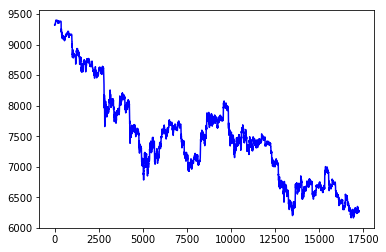

In [5]:
plt.plot(df['close'], 'b')

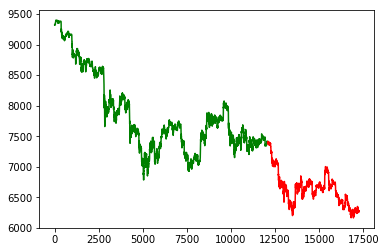

In [9]:
max = df['close'].count()
limit = int(0.3 * max)
plt.plot(df['close'][0:max - limit], 'g')
plt.plot(df['close'][-limit:], 'r')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e17b860>,
      dtype=object)

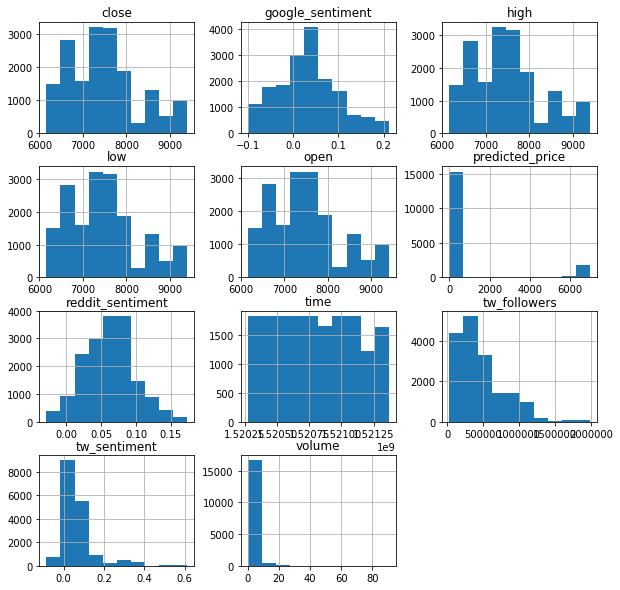

In [7]:
df.hist(figsize=(10,10))

In [14]:
from bitcoin.core import Core
core = Core()
history = core.train()

2018-03-18 11:36:20,428 root         INFO     ENV => test
2018-03-18 11:36:20,430 root         INFO     Train Model
2018-03-18 11:36:20,432 root         INFO     Load data from SQL.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 200)            164800    
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
__________

Epoch 30/100
12078/12078 [==============================] - 1s 88us/step - loss: 42.7833 - mean_squared_error: 0.0277 - mean_absolute_error: 0.1409 - val_loss: 41.0962 - val_mean_squared_error: 0.1637 - val_mean_absolute_error: 0.3679
Epoch 31/100
12078/12078 [==============================] - 1s 88us/step - loss: 40.8597 - mean_squared_error: 0.0242 - mean_absolute_error: 0.1314 - val_loss: 39.2120 - val_mean_squared_error: 0.1396 - val_mean_absolute_error: 0.3365
Epoch 32/100
12078/12078 [==============================] - 1s 87us/step - loss: 38.9981 - mean_squared_error: 0.0214 - mean_absolute_error: 0.1226 - val_loss: 37.4152 - val_mean_squared_error: 0.1204 - val_mean_absolute_error: 0.3103
Epoch 33/100
12078/12078 [==============================] - 1s 88us/step - loss: 37.2205 - mean_squared_error: 0.0194 - mean_absolute_error: 0.1156 - val_loss: 35.6866 - val_mean_squared_error: 0.1064 - val_mean_absolute_error: 0.2910
Epoch 34/100
12078/12078 [==============================] - 

Epoch 65/100
12078/12078 [==============================] - 1s 94us/step - loss: 6.8359 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0283 - val_loss: 6.4444 - val_mean_squared_error: 3.8215e-04 - val_mean_absolute_error: 0.0154
Epoch 66/100
12078/12078 [==============================] - 1s 90us/step - loss: 6.4569 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0279 - val_loss: 6.0887 - val_mean_squared_error: 4.5616e-04 - val_mean_absolute_error: 0.0175
Epoch 67/100
12078/12078 [==============================] - 1s 92us/step - loss: 6.0988 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0277 - val_loss: 5.7463 - val_mean_squared_error: 4.8106e-04 - val_mean_absolute_error: 0.0183
Epoch 68/100
12078/12078 [==============================] - 1s 91us/step - loss: 5.7563 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0283 - val_loss: 5.4256 - val_mean_squared_error: 3.7439e-04 - val_mean_absolute_error: 0.0159
Epoch 69/100
12078/12078 [==========================

Epoch 100/100
12078/12078 [==============================] - 1s 92us/step - loss: 1.1697 - mean_squared_error: 0.0010 - mean_absolute_error: 0.0232 - val_loss: 1.1359 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0315


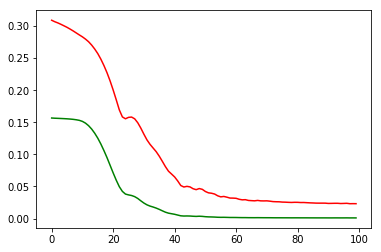

In [15]:
plt.plot(history.history['mean_absolute_error'], 'r')
plt.plot(history.history['mean_squared_error'], 'g')

In [16]:
core.train_anomaly()

2018-03-18 11:39:03,780 root         INFO     Train Anomaly Model
2018-03-18 11:39:03,782 root         INFO     Load data from SQL.


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   20.9s
[Parallel(n_jobs=10)]: Done 150 out of 150 | elapsed:   36.9s finished


KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [17]:
core.test_order_percent()

2018-03-18 11:40:09,204 root         INFO     Load data from SQL.
2018-03-18 11:40:30,517 root         INFO     Error Order percentage: 14.53%
2018-03-18 11:40:30,519 root         INFO     TEST From 2018-03-14 07:35:00 to 2018-03-18 11:12:00
2018-03-18 11:40:30,520 root         INFO     Number of api calls: 0.32 / min
2018-03-18 11:40:30,521 root         INFO     Number of anomalies: 599
2018-03-18 11:40:30,522 root         INFO     With prediction 1416.93 euros => 41.69% => 13.90% / day
2018-03-18 11:40:30,524 root         INFO     Without prediction 849.97 euros => -15.00% => -5.00% / day
